In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
main_df = pd.read_csv("Admission_Predict2.csv")
df = main_df.copy()

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [170]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admission_Chances'],
      dtype='object')

In [10]:
df.drop(['Serial No.'], axis = 1, inplace=True)
df.rename(columns={'Chance of Admit ':'Admission_Chances'}, inplace=True)

In [31]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission_Chances
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


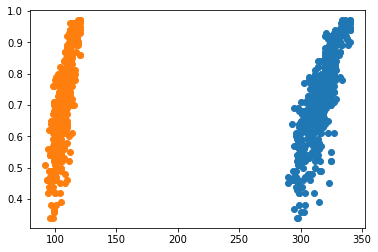

In [136]:
y = df['Admission_Chances']
x1 = df['GRE Score']
x2 = df['TOEFL Score']
plt.scatter(x1,y)
plt.scatter(x2,y)

In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
x = df.drop(['Admission_Chances'],axis=1)
y = df['Admission_Chances']
x_train,x_test,y_train,y_test = train_test_split(x, y , test_size=0.1, random_state=120,shuffle=True)

In [165]:
RFR = RandomForestRegressor(max_features = 'sqrt', min_samples_leaf = 2)
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [166]:
RFR.score(x_test,y_test)

0.8533342727404417

In [168]:
import pickle
with open('graduate_admissions.pickle', 'wb') as f:
    pickle.dump(RFR, f)

In [169]:
import json
columns = {
    'data_columns' : [col.upper() for col in x_train.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [177]:
def calc_chances(gre_score, toefl_score, university_rating, sop, lor, cgpa, research):

    x = np.zeros(len(x_train.columns))
    x[0] = gre_score
    x[1] = toefl_score
    x[2] = university_rating
    x[3] = sop
    x[4] = lor
    x[5] = cgpa
    x[6] = research
    chances = RFR.predict([x])[0]
    return chances

In [178]:
calc_chances(337,118,4,4.5,4.5,9.65,1)

0.9293451190476191